In [16]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [3]:
df = pd.read_csv('../bases_dados/credit_data.csv')
df.dropna(inplace=True)
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
x = df.iloc[:, 1:4].values
x

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [5]:
y = df.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [7]:
resultadosCV_bayes = []
resultadosCV_bayes300 = []
resultadosCV_logistica = []
resultadosCV_logistica300 = []
resultadosCV_arvores = []
resultadosCV_arvores300 = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    naive_bayes = GaussianNB()
    scores = cross_val_score(naive_bayes, x, y, cv=kfold)
    resultadosCV_bayes300.append(scores)
    resultadosCV_bayes.append(scores.mean())
    
    logistica = LogisticRegression()
    scores = cross_val_score(logistica, x, y, cv=kfold)
    resultadosCV_logistica300.append(scores)
    resultadosCV_logistica.append(scores.mean())
    
    floresta = RandomForestClassifier()
    scores = cross_val_score(floresta, x, y, cv=kfold)
    resultadosCV_arvores300.append(scores)
    resultadosCV_arvores.append(scores.mean())

In [8]:
len(resultadosCV_logistica), len(resultadosCV_logistica300)

(30, 30)

In [11]:
print(max(resultadosCV_bayes))

0.9263844221105527


In [15]:
print(resultadosCV_bayes300)

[array([0.91      , 0.93      , 0.96      , 0.925     , 0.94      ,
       0.895     , 0.965     , 0.89949749, 0.87939698, 0.94472362]), array([0.92      , 0.945     , 0.895     , 0.92      , 0.915     ,
       0.93      , 0.89      , 0.94974874, 0.93467337, 0.94974874]), array([0.93      , 0.89      , 0.94      , 0.935     , 0.905     ,
       0.935     , 0.935     , 0.91959799, 0.94472362, 0.91457286]), array([0.91      , 0.945     , 0.95      , 0.94      , 0.92      ,
       0.9       , 0.9       , 0.90954774, 0.91959799, 0.93467337]), array([0.96      , 0.93      , 0.94      , 0.905     , 0.935     ,
       0.93      , 0.905     , 0.90452261, 0.89949749, 0.93969849]), array([0.915     , 0.91      , 0.945     , 0.945     , 0.9       ,
       0.935     , 0.925     , 0.96482412, 0.89949749, 0.91457286]), array([0.955     , 0.935     , 0.915     , 0.94      , 0.905     ,
       0.9       , 0.925     , 0.92462312, 0.92462312, 0.91959799]), array([0.94      , 0.92      , 0.925     , 0.91

In [17]:
np.array(resultadosCV_arvores300).shape

(30, 10)

In [23]:
resultadosCV_bayes = np.array(resultadosCV_bayes)
resultadosCV_bayes300 = np.array(np.asarray(resultadosCV_bayes300).reshape(-1))

resultadosCV_logistica = np.array(resultadosCV_logistica)
resultadosCV_logistica300 = np.array(np.asarray(resultadosCV_logistica300).reshape(-1))

resultadosCV_arvores = np.array(resultadosCV_arvores)
resultadosCV_arvores300 = np.array(np.asarray(resultadosCV_arvores300).reshape(-1))

In [24]:
import seaborn as sns

In [25]:
resultadosCV_bayes300.shape

(300,)

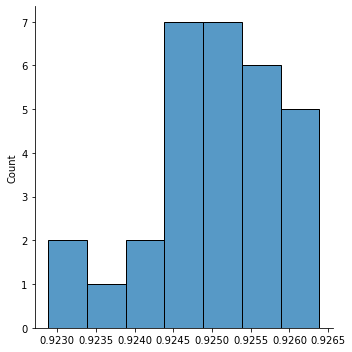

In [28]:
sns.displot(resultadosCV_bayes);

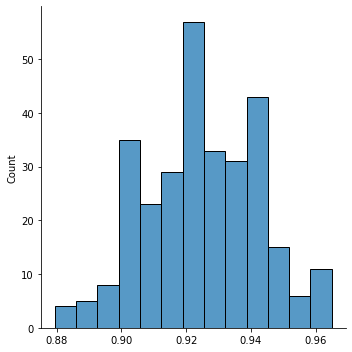

In [27]:
sns.displot(resultadosCV_bayes300);

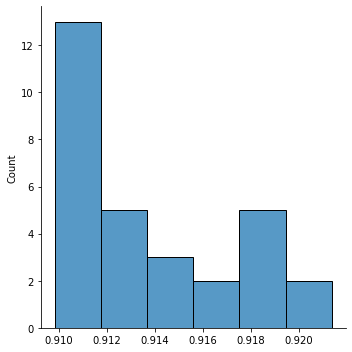

In [29]:
sns.displot(resultadosCV_logistica);

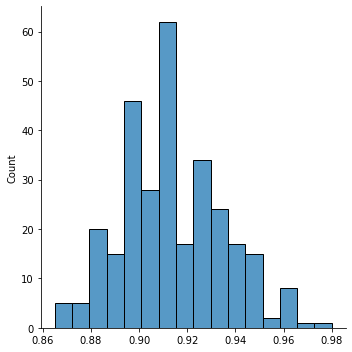

In [30]:
sns.displot(resultadosCV_logistica300);

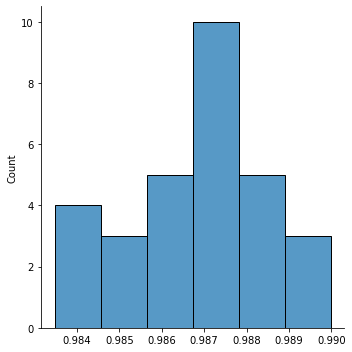

In [31]:
sns.displot(resultadosCV_arvores);

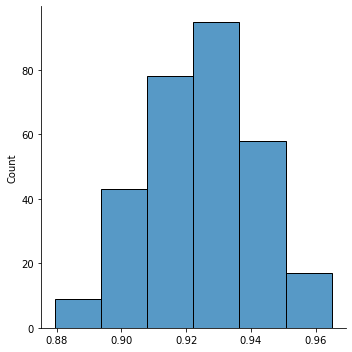

In [34]:
sns.displot(resultadosCV_arvores300, bins=6);

In [35]:
resultadosCV_bayes.mean(), resultadosCV_logistica.mean(), resultadosCV_arvores.mean()

(0.9249359296482411, 0.9137817420435511, 0.9867969849246232)

In [37]:
stats.variation(resultadosCV_bayes) * 100

0.08641071566366061

In [38]:
stats.variation(resultadosCV_logistica) * 100

0.38801026116292653

In [39]:
stats.variation(resultadosCV_arvores) * 100

0.15419901935329602

## Intervalos de confiança

In [40]:
from scipy.stats import t
from scipy.stats import norm

### Naive Bayes

In [41]:
intervaloT_naive = t.interval(0.95, len(resultadosCV_bayes) - 1,
                             resultadosCV_bayes.mean(),
                             stats.sem(resultadosCV_bayes, ddof=0))
intervaloT_naive

(0.9246374871248957, 0.9252343721715865)

In [42]:
abs(resultadosCV_bayes.mean() - intervaloT_naive[1])

0.0002984425233454324

In [49]:
intervalosN_naive = norm.interval(0.95, resultadosCV_bayes300.mean(), 
                                         stats.sem(resultadosCV_bayes300))

intervalosN_naive

(0.9229333893644709, 0.9269384699320113)

In [51]:
abs(resultadosCV_arvores300.mean() - intervalosN_naive[1])

0.0020025402837702266

### Regressão Logística

In [43]:
intervalosT_logistica = t.interval(0.95, len(resultadosCV_logistica) - 1,
                                  resultadosCV_logistica.mean(),
                                  stats.sem(resultadosCV_logistica, ddof=0))
intervalosT_logistica

(0.9124578055959317, 0.9151056784911705)

In [45]:
abs(resultadosCV_logistica.mean() - intervalosT_logistica[1])

0.0013239364476194115

In [52]:
intervalosN_logistica = norm.interval(0.95, resultadosCV_logistica300.mean(), 
                                       stats.sem(resultadosCV_logistica300))

intervalosN_logistica

(0.9114192660020396, 0.9161442180850629)

In [53]:
abs(resultadosCV_logistica300.mean() - intervalosN_logistica[1])

0.0023624760415116297

### Random Forest

In [46]:
intervalosT_floresta = t.interval(0.95, len(resultadosCV_arvores) - 1,
                                 resultadosCV_arvores.mean(),
                                 stats.sem(resultadosCV_arvores, ddof=0))
intervalosT_floresta

(0.9862287984691176, 0.9873651713801288)

In [48]:
abs(resultadosCV_arvores.mean() - intervalosT_floresta[1])

0.0005681864555056038

In [59]:
intervalosN_floresta = norm.interval(0.95, resultadosCV_arvores300.mean(), 
                                    stats.sem(resultadosCV_arvores300))

intervalosN_floresta

(0.9229333893644709, 0.9269384699320113)

In [60]:
abs(resultadosCV_arvores300.mean() - intervalosN_floresta[1])

0.0020025402837702266

**Temos 95% de confiança de que a média de acertos do Random Forest está
no intervalo entre 98,63% e 98,74% - 92,30% e 92,70%**

In [62]:
kfold = KFold(n_splits = 10, shuffle = True)

random_forest = RandomForestClassifier()
scores = cross_val_score(random_forest, x, y, cv = kfold)

print(scores.mean())

0.9869798994974875


In [63]:
print(scores)

[0.98       0.99       0.98       0.995      0.985      0.985
 0.995      0.99497487 0.98994975 0.97487437]
